In [117]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../datasets/AmesHousing.csv')

# Peek at the data
print(df.shape)
print(df.columns)
print(df.head())


(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

In [118]:
# Drop high-cardinality identifier columns
df = df.drop(columns=['Order', 'PID'])

In [119]:
# Drop columns with > 30% missing values
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.3].index
df = df.drop(columns=cols_to_drop)

In [120]:
# Impute numeric columns with median
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [121]:
# Impute categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [122]:
# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [123]:
# Separate features and target
X = df.drop(columns=['SalePrice']).values
y = df['SalePrice'].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2930, 242)
Shape of y: (2930, 1)


In [124]:
import sys
import os

# Add the parent directory (project root) to the path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [125]:
from utils.utils import train_test_split_custom

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2)

# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2344, 242)
Shape of X_test: (586, 242)
Shape of y_train: (2344, 1)
Shape of y_test: (586, 1)


In [126]:
from utils.scaler import StandardScaler 

scaler = StandardScaler()
print(type(X_train))  # Check the type
print(X_train[:5])     # Print the first few rows of X_train

# Fit the scaler to the training data and transform both training and test data
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# # Check the mean and standard deviation to confirm standardization
print("Mean of X_train (after standardization):", X_train_std.mean(axis=0))
print("Std of X_train (after standardization):", X_train_std.std(axis=0))

<class 'numpy.ndarray'>
[[70 68.0 5100 ... False True False]
 [160 21.0 1890 ... False True False]
 [60 62.0 7162 ... False True False]
 [20 60.0 8070 ... False True False]
 [30 50.0 7000 ... False True False]]
Mean of X_train (after standardization): [ 1.87610640e-16 -5.89687571e-17  2.73056132e-17 -6.77785473e-17
  5.16083194e-16 -6.78638033e-16  3.74823418e-15  3.18289195e-17
  2.13341385e-16 -2.48568704e-16  3.15920972e-17 -1.64780969e-16
 -1.05551707e-16  1.57913121e-16  1.55935655e-16 -7.75119445e-17
 -1.08180435e-16  4.71181683e-16  2.99059223e-16  3.29372479e-16
  1.63975773e-16  7.26807693e-17  2.56383841e-16  9.35921799e-17
 -1.05016488e-15 -1.24000165e-16 -7.38885631e-17  4.81222949e-17
 -5.16272652e-17  1.23100241e-16 -2.59734877e-16 -1.91873442e-16
  3.57175419e-16 -8.97828929e-16 -4.41436800e-17 -8.33243220e-14
  6.62072312e-16  1.34988721e-18 -7.24584523e-16  9.03856057e-16
  4.36795082e-16  1.75437973e-16  3.13351449e-16 -5.65863246e-16
  2.11955974e-16 -8.23668020e-17 

In [127]:
X_train_std_b = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]
X_test_std_b = np.c_[np.ones((X_test_std.shape[0], 1)), X_test_std]


Epoch 0: Loss = 35649024500.9148
Epoch 100: Loss = 1236494800.8719
Epoch 200: Loss = 639832127.0274
Epoch 300: Loss = 608977706.1289
Epoch 400: Loss = 596046087.0812
Epoch 500: Loss = 587134346.4265
Epoch 600: Loss = 580348816.4184
Epoch 700: Loss = 574871932.5282
Epoch 800: Loss = 570265789.1664
Epoch 900: Loss = 566272315.0246


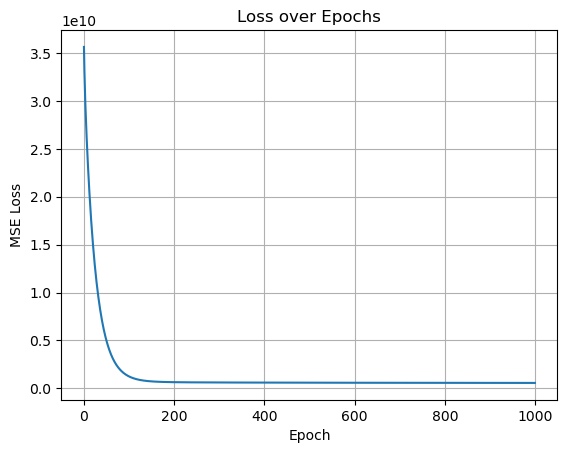

Train R²: 0.9142
Test R²: 0.8905


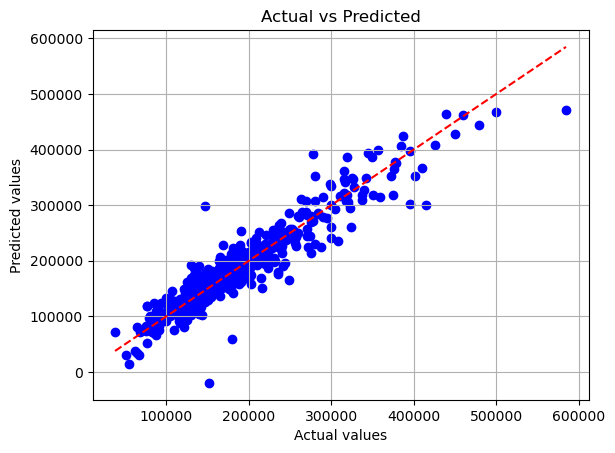

In [128]:
import importlib
import ml_algorithms.linear_regression
importlib.reload(ml_algorithms.linear_regression)

from ml_algorithms.linear_regression import MultipleLinearRegression

baseline_model = MultipleLinearRegression()
baseline_model.fit(X_train_std_b, y_train, learning_rate=0.01, epochs=1000)

train_r2 = baseline_model.r2_score(X_train_std_b, y_train)
test_r2 = baseline_model.r2_score(X_test_std_b, y_test)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

baseline_model.plot_predictions(X_test_std_b, y_test)


Epoch 0: Ridge Loss = 38989835515.6902
Epoch 100: Ridge Loss = 23187487322.6730
Epoch 200: Ridge Loss = 15702923837.9255
Epoch 300: Ridge Loss = 10765778221.3806
Epoch 400: Ridge Loss = 7469179404.2476
Epoch 500: Ridge Loss = 5261422617.8408
Epoch 600: Ridge Loss = 3781247187.2746
Epoch 700: Ridge Loss = 2788235201.7264
Epoch 800: Ridge Loss = 2121674418.1143
Epoch 900: Ridge Loss = 1673972375.3769
Epoch 1000: Ridge Loss = 1373052493.5058
Epoch 1100: Ridge Loss = 1170612677.6325
Epoch 1200: Ridge Loss = 1034274402.8506
Epoch 1300: Ridge Loss = 942327805.6013
Epoch 1400: Ridge Loss = 880212607.1305
Epoch 1500: Ridge Loss = 838160766.8873
Epoch 1600: Ridge Loss = 809617009.5797
Epoch 1700: Ridge Loss = 790180355.8641
Epoch 1800: Ridge Loss = 776894684.1398
Epoch 1900: Ridge Loss = 767773155.1825


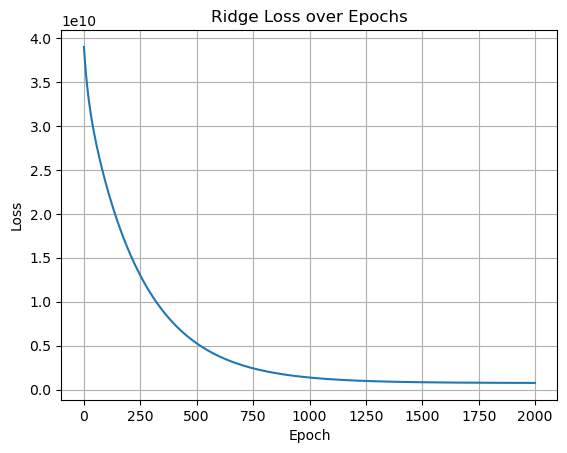

Ridge Train R²: 0.9022
Ridge Test R²: 0.8898


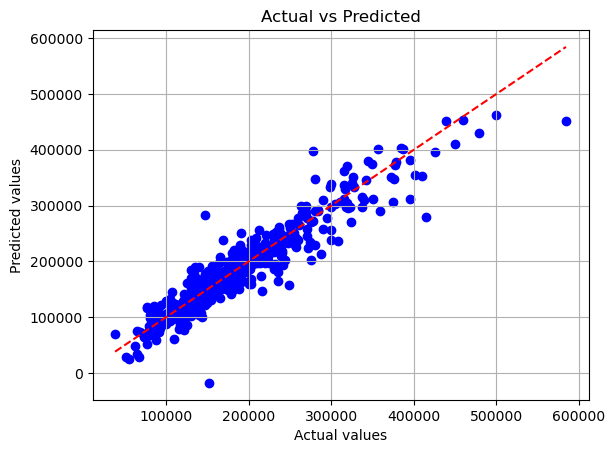

In [129]:
from ml_algorithms.linear_regression import RidgeRegression  # ✅ Import Ridge

ridge_model = RidgeRegression(lr=0.001, n_iters=2000, lambda_=0.1)
ridge_model.fit(X_train_std_b, y_train)

ridge_train_r2 = ridge_model.r2_score(X_train_std_b, y_train)
ridge_test_r2 = ridge_model.r2_score(X_test_std_b, y_test)

print(f"Ridge Train R²: {ridge_train_r2:.4f}")
print(f"Ridge Test R²: {ridge_test_r2:.4f}")

ridge_model.plot_predictions(X_test_std_b, y_test)


## Impact of Regularization on Model Performance

### **Before Regularization (Linear Regression)**
- **Train R²**: 0.9142
- **Test R²**: 0.8905

The **Train R²** of 0.9142 indicates that the model fits the training data well. However, the **Test R²** of 0.8905 is lower, which suggests that the model doesn't generalize as well to unseen data. The relatively small difference (0.0237) suggests that the model could be **slightly overfitting** the training data.

### **After Regularization (Ridge Regression)**
- **Train R²**: 0.9022
- **Test R²**: 0.8898

After applying regularization, the **Train R²** decreased slightly to 0.9022, and the **Test R²** remained quite close at 0.8898. The **difference** between Train and Test R² has decreased from **0.0237 to 0.0124**. This indicates that the regularization has helped in **reducing overfitting** and improving the model's ability to generalize to unseen data.

### **Difference Between Train and Test R²**
- **Before Regularization**:
  - Difference = **0.0237**
  - A relatively small difference suggests that the model fit the training data well but showed slight overfitting.

- **After Regularization**:
  - Difference = **0.0124**
  - The reduced difference shows that regularization has improved the model's generalization and reduced overfitting.

### **Conclusion**
Regularization techniques like **Ridge regression** help prevent overfitting by reducing the complexity of the model. In this case, the application of Ridge regression has led to a smaller gap between the Train and Test R² scores, indicating better generalization to new, unseen data.
